# **Ufunc: Index Preservation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))

print(ser)

0    6
1    3
2    7
3    4
dtype: int32


In [3]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])

print(df)

   A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4


In [4]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [5]:
np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


# **UFuncs: Index Alignment**

* **Index alignment in Series**

In [7]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [9]:
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [10]:
area.index | population.index   # check Handling missing data

TypeError: unsupported operand type(s) for |: 'str' and 'str'

In [11]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

print(A + B)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64


In [12]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

* **Index Alignment in DataFrame**

In [13]:
A = pd.DataFrame(rng.randint(0, 20, (2,2 )),
                 columns=list('AB'))
print(A)

   A   B
0  1  11
1  5   1


In [14]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
print(B)

   B  A  C
0  4  0  9
1  5  8  0
2  9  2  6


In [15]:
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [16]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


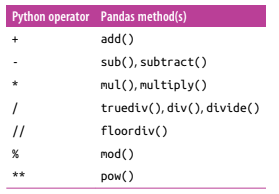

# **Ufunc:Operations Between DataFrame and Series**

In [17]:
A = rng.randint(10, size=(3, 4))
print(A)

[[3 8 2 4]
 [2 6 4 8]
 [6 1 3 8]]


In [18]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [19]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [21]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [22]:
halfrow = df.iloc[0, ::2]
print(halfrow)

Q    3
S    2
Name: 0, dtype: int32


In [23]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN
